In [25]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [34]:
# restore model
sess = tf.Session()
saver = tf.train.import_meta_graph('../runs/20180517-003446.meta')
saver.restore(sess,tf.train.latest_checkpoint('../runs/'))

INFO:tensorflow:Restoring parameters from ../runs/20180517-003446


In [35]:
# get tensors of interest
graph = tf.get_default_graph()
logits = graph.get_tensor_by_name("output/logits/BiasAdd:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
input_image = graph.get_tensor_by_name("image_input:0")

(-0.5, 1241.5, 374.5, -0.5)

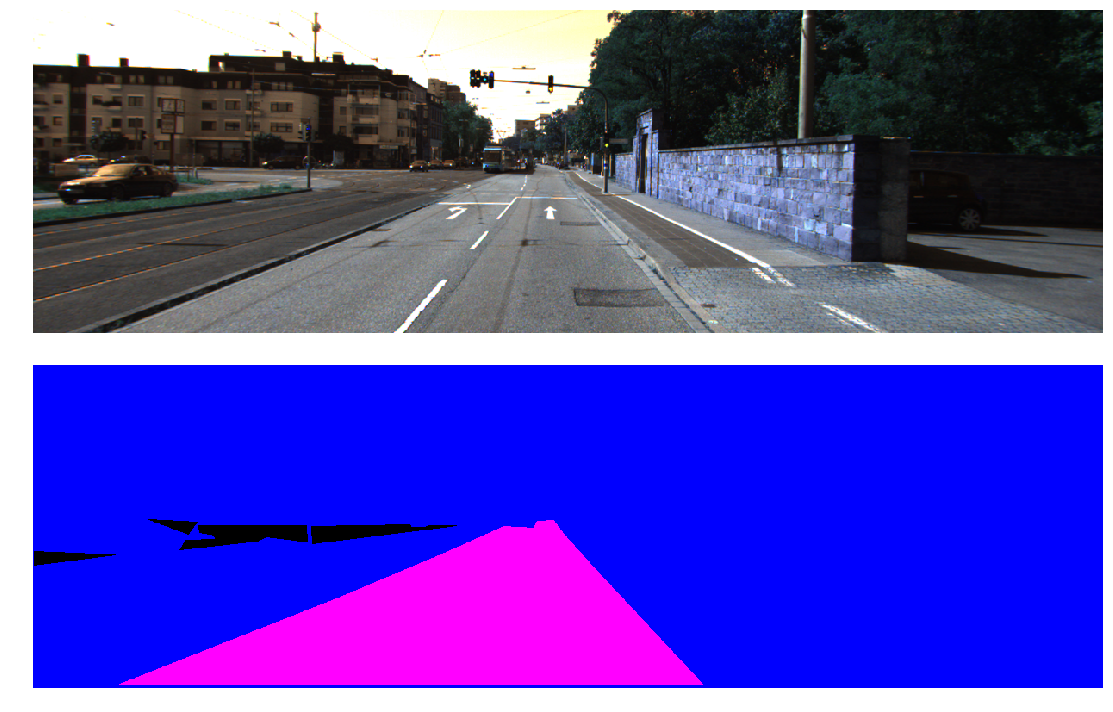

In [36]:
# plot image and ground truth
image_file = '../data/data_road/training/overfit/um_000003.png'
gt_file = '../data/data_road/training/gt_image_2/um_road_000003.png'

img = cv2.imread(image_file)
gt_img = cv2.imread(gt_file)

f, axs = plt.subplots(2, 1, figsize=(20,10))
f.tight_layout()

axs[0].imshow(img)
axs[0].axis('off')
axs[1].imshow(gt_img)
axs[1].axis('off')

In [37]:
# predict on image
num_classes = 2
image_shape = (160, 576)
    
image_file = '../data/data_road/training/overfit/um_000003.png'
image = cv2.resize(cv2.imread(image_file), image_shape[::-1])

im_softmax = sess.run(
    tf.nn.softmax(logits),
    {keep_prob: 1.0, input_image: image[None,:]})
im_softmax = im_softmax[0][:,:,1]
segmentation = (im_softmax > 0.5)[:,:,None]
mask = np.dot(segmentation, np.array([[0, 255, 0]], dtype='uint8'))
street_im = cv2.addWeighted(image, 1, mask, 0.5, 0)

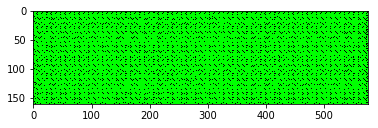

In [38]:
plt.imshow(mask)

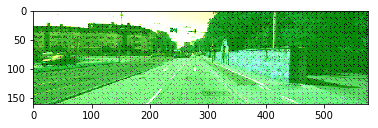

In [39]:
plt.imshow(street_im)

In [32]:
import scipy.misc

#using scipy
image = scipy.misc.imresize(scipy.misc.imread(image_file), image_shape)
im_softmax = sess.run(
    tf.nn.softmax(logits),
    {keep_prob: 1.0, input_image: image[None,:]})
im_softmax = im_softmax[0][:,:,1]
segmentation = (im_softmax > 0.5)[:,:,None]
mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
mask = scipy.misc.toimage(mask, mode="RGBA")
street_im = scipy.misc.toimage(image)
street_im.paste(mask, box=None, mask=mask)

/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # This is added back by InteractiveShellApp.init_path()
/home/dhruva/anaconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning

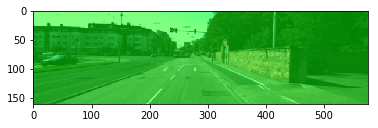

In [33]:
plt.imshow(street_im)